<a href="https://colab.research.google.com/github/flowmasterB/tensorflow-flowmasterB-teaching/blob/main/01_Neural_Network_Regression_with_Tensorflow_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro to neural network regression w/ TensorFlow**
# Predicting numbers as outcomes based on other numbers.

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers

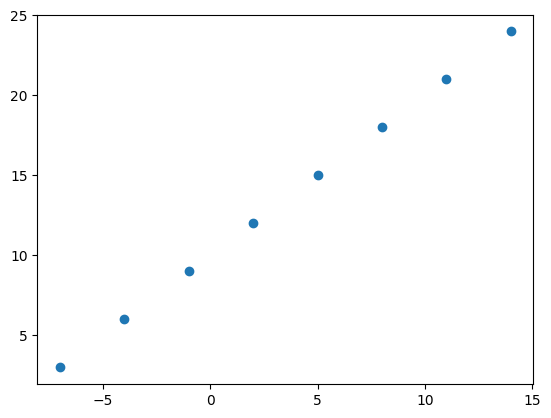

In [7]:
# create data to view and fit

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# creatwe labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize
plt.scatter(X, y);

In [8]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [9]:
y == X + 10 # relationship trying to learn -- the function between - ind var

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [10]:
# input and output shapes
# create a demo tensor
house_info = tf.constant(["bedrooms", "bathrooms", "# of car(s) garage space"])
house_price = tf.constant([937000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=
 array([b'bedrooms', b'bathrooms', b'# of car(s) garage space'],
       dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937000], dtype=int32)>)

In [11]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [12]:
X[0],  y[0]

(-7.0, 3.0)

In [13]:
# major steps in modeling w/ tf -- turn np arrays into tensors w/ dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape # returned a scalar

(TensorShape([]), TensorShape([]))

# **Steps for ML modeling**
1. **create a model:** define the input and output layers, also to include the hidden layers of a deep learning model.
2. **compile the model:** the function which tells our model how wrong it is, and the optimizer, which tells our model how to improve the patterns it learns. Evaluation metrics, used to interpret model performance
3. **fiting a model:** letting the model find patterns between X AND Y, aka features

# **Steps in TF:**
1. Get data ready -- convert to tensors
2. build or pick a model to suit problem
3. fit the model to the data and make a prediction
4. evaluate the model
5. save and reload the trained model

In [15]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using sequential api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # using one number to predict one number
])

#2. compile model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD stochastic gradient descent
              metrics=["mae"])

#3 fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5) # 5 tries to figure out a pattern


Epoch 1/5
1/1 [==============================] - 0s 364ms/step - loss: 14.7328 - mae: 14.7328
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 14.6003 - mae: 14.6003
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 14.4678 - mae: 14.4678
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 14.3353 - mae: 14.3353
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 14.2028 - mae: 14.2028


In [16]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# try to predict using the model
model.predict([27]) # not very good -- we were expecting an approx. return of 10

1/1 [==============================] - 0s 67ms/step


array([[-4.735444]], dtype=float32)

# Improving the model
We can improve the model by altering/adjustiung the steps we used to create it.
1. create model -- add more layer, increase # of hidden units(neurons) within
each of the hidden layers - change activation function of each layer
2. compile model -- change optimization function -- learning rate hyper parameter of optimization function
3. fit model -- more epochs/rounds -- longer training time, or more examples to learn from

## lets create a larger model to see if we can improve our model and see if
## can predict the X + 10 fucntion pattern. Our first 5 epochs wasn't even close.


In [18]:
#1 create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2 compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # originally used SGD()
              # error was near 3 points - result was 29.87 -- Adam was very close!
              metrics=["mae"])
#3 fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 286ms/step - loss: 17.2414 - mae: 17.2414
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 17.2354 - mae: 17.2354
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 17.2294 - mae: 17.2294
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 17.2234 - mae: 17.2234
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 17.2174 - mae: 17.2174
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 17.2114 - mae: 17.2114
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 17.2054 - mae: 17.2054
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 17.1994 - mae: 17.1994
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 17.1934 - mae: 17.1934
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 17.1874 - mae: 17.1874
Epoch 11/100
1/1 [==============================] - 0s 

In [19]:
# show the data for a reminder
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
# LETS PREDICT! Did we improve?
model.predict([17.0]) # this has been run several times - not reflective of
# of original run w/ result of 27.136837

1/1 [==============================] - 0s 47ms/step


array([[-12.743446]], dtype=float32)

In [21]:
## Very nice... much better! using Adam reduced the error to within .136837
# remember my 1st run with SGD() as optimizer was 2.87 in error!
# Let's try to add more in baby steps towards a larger model.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), # originally .0001
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 380ms/step - loss: 9.3790 - mae: 9.3790
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 8.9290 - mae: 8.9290
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 8.4790 - mae: 8.4790
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 8.0290 - mae: 8.0290
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5790 - mae: 7.5790
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 7.1290 - mae: 7.1290
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.0500 - mae: 7.0500
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.0289 - mae: 7.0289
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.1414 - mae: 7.1414
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.1919 - mae: 7.1919
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 7.19

In [22]:
# now predict again and let's see...
model.predict([17.0])

1/1 [==============================] - 0s 67ms/step


array([[26.918203]], dtype=float32)

In [23]:
# not good -- adding the hidden layer made it worse, even with Adam --
# then used .1 as learning rate and got the above result...NICE! - .09747 error!

#Evaluating a model
### In practice, tytpical workflow is as follows when building neural networks:
### Build a model --> fit --> evaluate it --> tweak it --> fit it --> eval --
### tweak --> fit --> eval...
### Most important -- visualize, visualize visualize
### * the data -- what data are we working with?
### * training -- how does it perform while it learns?
### * predictions of the model -- do they line up against the ground truth (original labels)


In [24]:
# let's make a larger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# make labels
y= X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

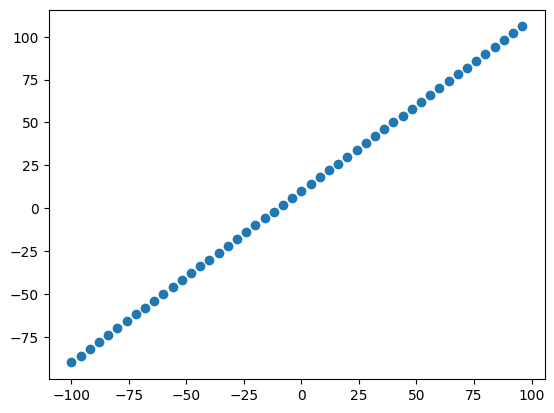

In [26]:
# visualize data
plt.scatter(X, y)

# **The three set theory/idea**
## * **Training set** -- data to learn from - typically 70-80% of total data in store
## * **Validation set** - the model gets tuned on this dataset -- typically 10-15% of data in store
## * **Test set** - evaluation againsty this set to test what has been learned, typically 10-15% of data in store   

In [27]:
# Check length of how many samples we have
len(X)

50

In [28]:
# spliot data into training and test set
X_train = X[:40] # first 40 traing samples = 80% of data
y_train = y[:40]
X_test = X[40:] # last 10 = 20% of data
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

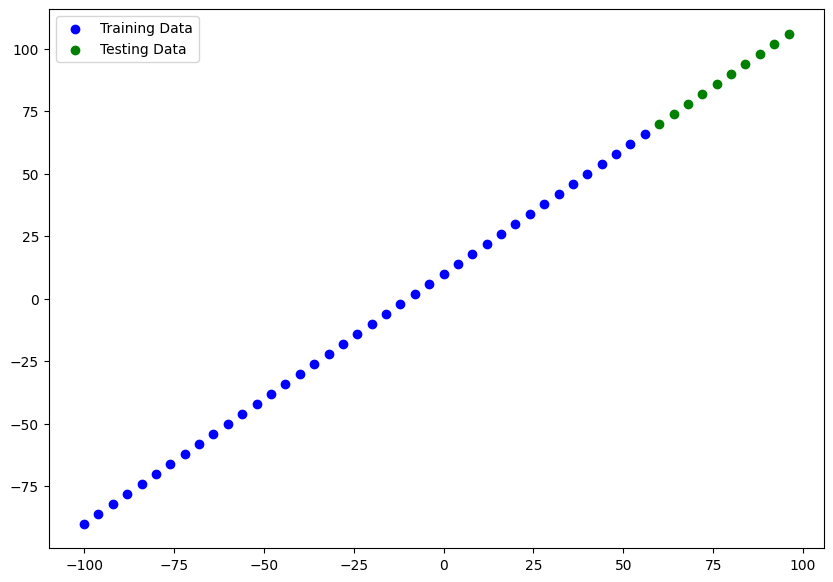

In [29]:
# Visualize training and test sets
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
#plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing Data")
# Show a legend
plt.legend();

In [30]:
# create new larger model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0018),
              metrics=["mae"]
              )
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 40.0679 - mae: 40.0679
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 33.1814 - mae: 33.1814
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 27.6346 - mae: 27.6346
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 21.4456 - mae: 21.4456
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.7616 - mae: 14.7616
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 10.3125 - mae: 10.3125
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.9539 - mae: 11.9539
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 8.1853 - mae: 8.1853
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 4.7579 - mae: 4.7579
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 6.7727 - mae: 6.7727
Epoch 11/100
2/2 [==============================] - 0s 5ms/step -

In [31]:
model.predict([36])

1/1 [==============================] - 0s 65ms/step


array([[46.830826]], dtype=float32)

In [32]:
# pretty good! I adjusted the lr (learning_rate) from .0001 to what it is now
# I adjusted several times to end up with that learning_rate of .0018

In [33]:
X.shape

TensorShape([50])

In [34]:
# Build a model that auto builds by defining input_shape argument in the 1st layer
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # 10 = output
    # where 1 = input - see plot_model image below
    tf.keras.layers.Dense(1, name="output_layer")
], name="Sample_1")

# good to name your layers and models for better organization

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 22.9266 - mae: 22.9266
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 17.3679 - mae: 17.3679
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 12.2155 - mae: 12.2155
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 8.1351 - mae: 8.1351
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0879 - mae: 9.0879
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1192 - mae: 11.1192
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.9816 - mae: 11.9816
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.9918 - mae: 11.9918
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 11.4167 - mae: 11.4167
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3357 - mae: 10.3357
Epoch 11/100
2/2 [==============================] - 0s 4ms/step

In [35]:
model.summary() # verify against plot_model resultant image below

Model: "Sample_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Total params** = total # of parameters in model
## **Trainable parameters** = patterns model can update as it trains
## **Non-trainable params** = not updated during training -- imported models during transfer learning

In [36]:
# visualizing a model's layers
from tensorflow.keras.utils import plot_model

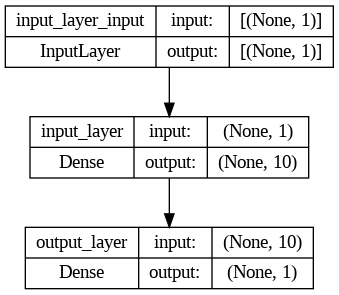

In [37]:
plot_model(model=model, show_shapes=True)

In [38]:
# Vizualizing our model's predictions

In [39]:
#to viz predictions -- plot against ground truth layers
# i.e form of 'y_test' or 'y_true' vs 'y_preds'

# make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 38ms/step


array([[ 70.52793 ],
       [ 74.56015 ],
       [ 78.59238 ],
       [ 82.62461 ],
       [ 86.656845],
       [ 90.68907 ],
       [ 94.7213  ],
       [ 98.753525],
       [102.78575 ],
       [106.817986]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
# viz by plot if you are going to reuse functionality - good idea to create
# a plotting function

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions top ground truth labels
  """
  plt.figure(figsize=(10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Test Data")
  # add extra dataset - plot predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show a legend
  plt.legend();

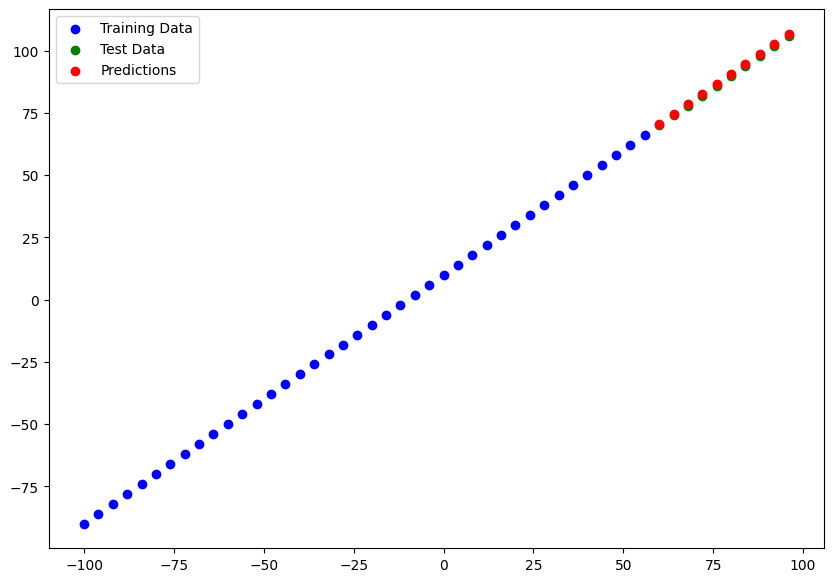

In [42]:
plot_predictions()

#ON THE MONEY THIS TIME! I adjusted the Adam optimizer learning_rate to .01 from
# .001

# **This file has been renamed to 01_Neural_Network_Regression_with_Tensorflow-A.ipynb to relect the more accurate result** the file w/out -A is the original

# https://github.com/flowmasterB/tensorflow-flowmasterB-teaching/blob/main/01_Neural_Network_Regression_with_Tensorflow-2nd-learning_rate-adjustment-to-.01.ipynb
# the above link has the notebook w/ the immensely accurate prediction I made
# using the Adam optimizer.

# Eval using regression eval methods/metrics to eval performance
# 2 main eval metrics are mae(mean absolute error) aka 'on avg how wrong is the
# prediction?' and mse(mean square error) aka 'square the avg errors'
# mae = good for starter metrics on any regression model
# mse = good for larger errors w/ more significance than smaller ones
# huber = combo of mae & mse -- less sensitive to outliers than mse

In [43]:
# eval model on testset
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 122ms/step - loss: 0.6730 - mae: 0.6730


[0.6729522943496704, 0.6729522943496704]

In [44]:
# calc the mean absolute error - mae
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.577656 , 14.46391  , 12.16305  , 10.675077 , 10.       ,
       10.1378145, 11.088519 , 12.852115 , 15.428601 , 18.817986 ],
      dtype=float32)>

In [45]:
tf.constant(y_pred) # shape is going to be prob -- need (10, ) not (10,1)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.52793 ],
       [ 74.56015 ],
       [ 78.59238 ],
       [ 82.62461 ],
       [ 86.656845],
       [ 90.68907 ],
       [ 94.7213  ],
       [ 98.753525],
       [102.78575 ],
       [106.817986]], dtype=float32)>

In [46]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [47]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.52793 ,  74.56015 ,  78.59238 ,  82.62461 ,  86.656845,
        90.68907 ,  94.7213  ,  98.753525, 102.78575 , 106.817986],
      dtype=float32)>

In [48]:
# calculate mae
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred)) # squeeze to
                                     # get same shape tensors - (10, )
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.67295456>

In [49]:
# calc mse mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.461437>

In [50]:
# make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,
                                        y_pred=tf.squeeze(y_pred))

# **Running experiments to improve model performance**
## Remember: in practice, typical workflow is as follows when building neural networks:
## Build a model --> fit --> evaluate it --> tweak it --> fit it --> eval --
## tweak --> fit --> eval...
## Most important -- visualize, visualize visualize in a ML explorer role

# ML practioner role the motto is:
# **EXPERIMENT EXPERIMENT EXPERIMENT**
# Start with small experiments - small models - verify they work - increase scale/complexity when necessaery.
## 1. get more data - get more examples for your model to train - more opportunities to learn patterns or relationships between features and labels.
## 2. make model larger - using more complex model -- more layers, hidden units in each layer.
## 3. Train model longer -- more chances
## Let's do 3 diff model experiments:
##    a. model 1 - original model - 1 layer - trained for 100 epochs
##    b. model 2 -- 2 layers -- 100 epochs
##    c. model 3 -- 2 layers -- 500 epochs

In [51]:
# let's build model 1 - set seed
tf.random.set_seed(42)

# create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
], name="Experiment_1")

# complie model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fit model
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 93.5712 - mae: 93.5712
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 58.1157 - mae: 58.1157
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 21.3093 - mae: 21.3093
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 13.2545 - mae: 13.2545
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 12.3312 - mae: 12.3312
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.5444 - mae: 9.5444
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6694 - mae: 8.6694
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0782 - mae: 9.0782
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 18.9493 - mae: 18.9493
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.2433 - mae: 10.2433
Epoch 11/100
2/2 [==============================] - 0s 5ms/step 

1/1 [==============================] - 0s 40ms/step


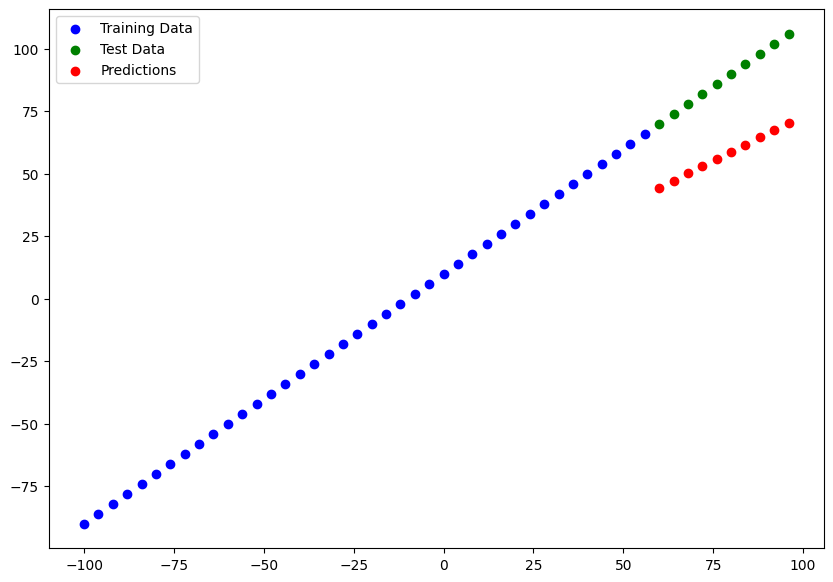

In [52]:
y_preds = model.predict(X_test)
plot_predictions(predictions=y_preds)

In [53]:
# Not so good
# calculate model eval metrics
mae_exp1 = mae(y_test, y_preds).numpy() # we used the tf.squeeze function in the def
mse_exp1 = mse(y_test, y_preds).numpy() # use numpy for reason below - pandas
                                          # DataFrame below
print(mae_exp1)
print("\n")
print(mse_exp1)

30.634945


948.90265


In [54]:
# result is auto squeezed!
# let's do model 2 - 2 dense layers -- 10 hidden units - 100 epochs
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 55.0150 - mae: 55.0150
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 29.4854 - mae: 29.4854
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 33.4978 - mae: 33.4978
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 13.3471 - mae: 13.3471
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 17.7090 - mae: 17.7090
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3226 - mae: 10.3226
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.3536 - mae: 11.3536
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2049 - mae: 11.2049
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 41.7050 - mae: 41.7050
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 28.9441 - mae: 28.9441
Epoch 11/100
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 22ms/step


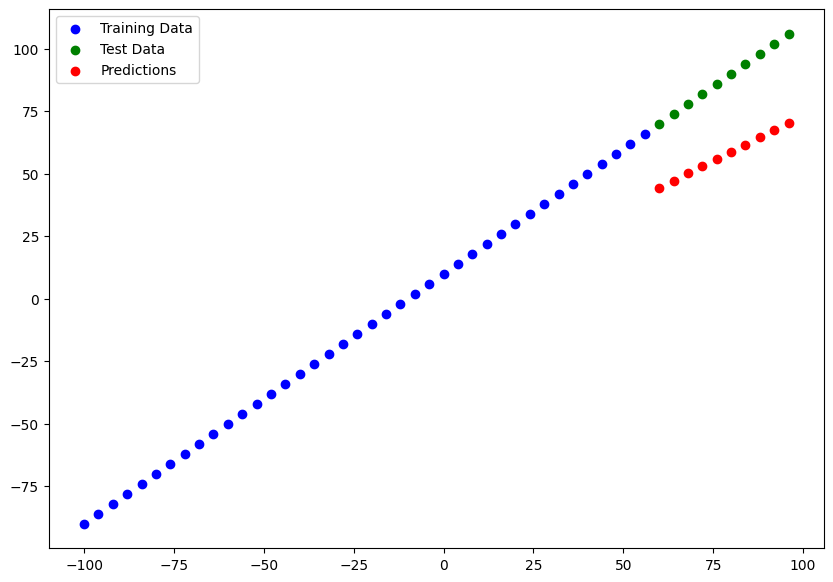

In [55]:
y_preds_2 = model.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [56]:
# better than model 1!
mae_exp2 = mae(y_test, y_preds_2).numpy() # we used the tf.squeeze function in the def
mse_exp2 = mse(y_test, y_preds_2).numpy() # use numpy for reason below - pandas
                                          # DataFrame below
print(mae_exp2)
print("\n")
print(mse_exp2)

30.634945


948.90265


In [57]:
# We see numerically that model 2 is more accurate than model 1 as well

In [58]:
# Let's do model 3 -- 2 layers - 100 - hidden - 500 epochs
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
 ])

model_3.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"]
                 )
model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 34.2247 - mae: 34.2247
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 28.3762 - mae: 28.3762
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 33.1171 - mae: 33.1171
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 29.1597 - mae: 29.1597
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 15.7873 - mae: 15.7873
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 12.5070 - mae: 12.5070
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.7616 - mae: 11.7616
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 12.1101 - mae: 12.1101
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 38.0267 - mae: 38.0267
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 25.6107 - mae: 25.6107
Epoch 11/500
2/2 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 64ms/step


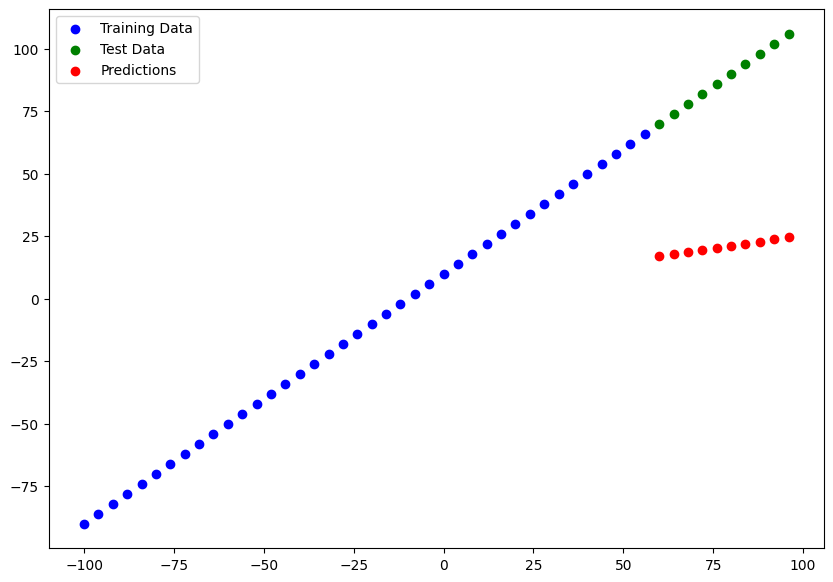

In [59]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [60]:
mae_exp3 = mae(y_test, y_preds_3).numpy() # we used the tf.squeeze function
mse_exp3 = mse(y_test, y_preds_3).numpy() # use numpy for reason below - pandas
                                          # DataFrame below
print(mae_exp3)
print("\n")
print(mse_exp3)

67.21578


4600.37


In [61]:
# THAT SUCKS!

In [62]:
# How to compare results of all 3 models
# Create a pandas DataFrame
import pandas as pd

In [63]:
model_results = (["model", mae_exp1, mse_exp1],
                 ["model_2", mae_exp2, mse_exp2],
                 ["model_3", mae_exp3, mse_exp3])
all_results = pd.DataFrame(model_results, columns=["Model Name", "MAE", "MSE"])
all_results

,Model Name,MAE,MSE
0,model,30.634945,948.902649
1,model_2,30.634945,948.902649
2,model_3,67.215782,4600.370117


In [64]:
# Model 2 is clear winner

# Minimize time between experiments should be one of main goals, the more experiments done, the more you will find what DOESN'T WORK, and get closer to what DOES WORK

# Tracking your experiments
## One good habit is to track results of experiments - can be tedious if you run a great deal of them. There are extensions, such as TensorBoard, a compnent of the TensorFlow library to help track experiments. (We will revist this later)

In [65]:
# Saving our models for export for outside colab, such as an app
# SavedModel format is default
# keras format

In [66]:
model_2.save("model_2")

In [67]:
model_2.save("model_2.keras")

In [68]:
# load saved models
load_model_default = tf.keras.models.load_model("/content/model_2")
load_model_default.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
load_keras_model_2 = tf.keras.models.load_model("model_2.keras")
load_keras_model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
# Same all the way around
# Compare predictions
model_2_preds = model_2.predict(X_test)
load_keras_model_2_preds = load_keras_model_2.predict(X_test)
model_2_preds == load_keras_model_2_preds

1/1 [==============================] - 0s 52ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [72]:
# SWEET! IDENTICAL -- on to our capstone for this section!

# Larger datasets capstone for section 01 -- putting together what we have learned so far.
### We will be using the Medical Cost Personal Dataset. We will try to predict the individual medical costs billed by health insurance.
### https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

In [73]:
## Libraries import
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
# Read in the insurance dataset listed above from github
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance
# since we are working with trying to predict a number from other numbers,
# we will be using regression analysis.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## We need a dependent variable(outcome) and indepent variables(features) identified
## The dependent variable will be charges(what we are trying to predict)
## The independent features will be the rest of the columnar data categories, seen above: age, sex, bmi, children, smoker, region. These will be transformed into numerical values that we will use for our neural network.

In [75]:
# Let's one-hot encode our DataFrame to convert string based categories to
# numbers first, so we can create a neural network regression model by th use
# of Pandas get_dummies function, basically one-hot encoding.

In [76]:
insurance_one_hot = pd.get_dummies(insurance) # let's save as a variable
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [77]:
# Create X & y values for model creation (neural network) training and test sets
# Create X -- feature set

In [78]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
# view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [79]:
# view y -- aka label vector
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [80]:
# Excellent, we have isolated charges as the dependent variable
# Create the training and test sets --  we can use scikitlearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [81]:
# Create/build neural network akin to model_2 from 01 notebook
tf.random.set_seed(42)
charges_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ], name="charges_model_1")
# compile model
charges_model_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# fit the model
charges_model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8594.9189 - mae: 8594.9189
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7885.2017 - mae: 7885.2017
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7576.6509 - mae: 7576.6509
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7610.5283 - mae: 7610.5283
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7661.4385 - mae: 7661.4385
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7593.6636 - mae: 7593.6636
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7571.6543 - mae: 7571.6543
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7806.8501 - mae: 7806.8501
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7626.5869 - mae: 7626.5869
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7684.4927 - mae: 7684.4927

In [82]:
charges_model_1.summary()

Model: "charges_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1, 10)             120       
                                                                 
 dense_13 (Dense)            (None, 1, 1)              11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
charges_model_1.evaluate(X_test, y_test ) # wrong by 7108 approx on average

9/9 [==============================] - 0s 1ms/step - loss: 6946.2852 - mae: 6946.2852


[6946.28515625, 6946.28515625]

In [84]:
y_train.median(), y_train.mean() # substantially incorrect

(9575.4421, 13346.089736364485)

In [85]:
# We need to improve our model for a better result -- experiment!

In [86]:
# lets create a new model with improvements as we have done before
# we will add more layers and increase Density of hideden layers & epochs
# and use Adam as the optimizer
tf.random.set_seed(42)
charges_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

charges_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
training_history = charges_model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 1ms/step - loss: 13288.3760 - mae: 13288.3760
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13112.8496 - mae: 13112.8496
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12763.3408 - mae: 12763.3408
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12086.7422 - mae: 12086.7422
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 10955.2881 - mae: 10955.2881
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9496.0957 - mae: 9496.0957
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8147.5288 - mae: 8147.5288
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7509.2554 - mae: 7509.2554
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7411.0942 - mae: 7411.0942
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7391.2578 - mae:

In [87]:
charges_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3487.4182 - mae: 3487.4182


[3487.418212890625, 3487.418212890625]

In [88]:
# WOW, we cut it in approx. half! Let's check our training history and see

Text(0.5, 0, 'epochs')

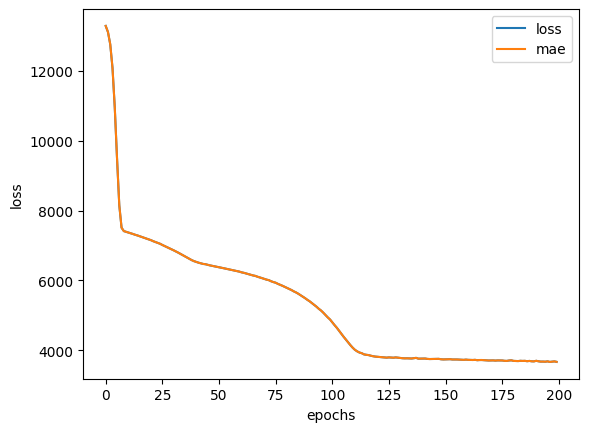

In [89]:
# Plot history aka training curve or loss curve
pd.DataFrame(training_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# This is a good sign!
## We see the curve on a steep decline. So we see that if we train longer, we may get closer to more accuracy. So that begs the ? How long to train for? Answer: it depends. lol
## There is no immutable answer.
## But... maybe there is... EarlyStopping Callback :-)
## TensorFlow component that stops the model training epochs once it stops improving a certain metric. We will explore later on!

In [90]:
# Ok, great work there! Now let's move on to getting closer to the section end
# Preprocessing data w/ feature scaling

In [91]:
# Preprocessinfg data, aka normalization & standardization

In [92]:
# Let's see what our data looks like
X # noticd how age and bmi are on different scales

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

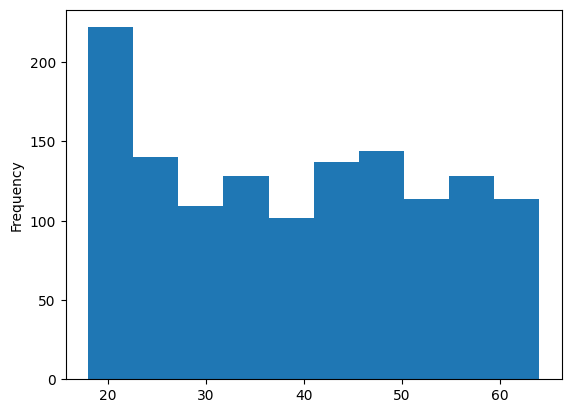

In [95]:
X["age"].plot.hist() # distribution is all over the place

<Axes: ylabel='Frequency'>

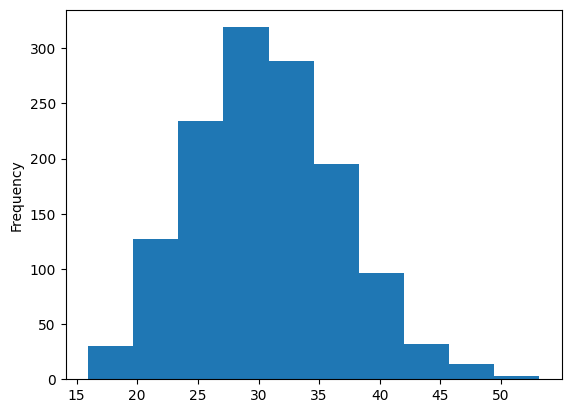

In [96]:
X["bmi"].plot.hist()

<Axes: ylabel='Frequency'>

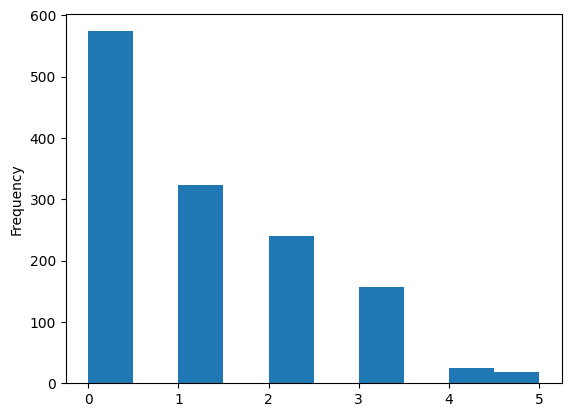

In [97]:
# let's add in number of children too
X["children"].plot.hist()

In [98]:
# How do we get them all on the same scale?
# age is from 0-60, bmi 15 - 50, and children 0-5
# NORMALIZATION! Let's use a scale niormalizer -- default for neural networks

In [100]:
insurance # looking at our data again in the original form

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [103]:
from keras.src.engine.data_adapter import train_validation_split
# Let's prepare this data again, using scikitlearn classes
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# MinMaxScaler converts all values to between 0 & 1 while preserving orig. dist
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # columns need to normalize
                                                  # to values between 0 & 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Need training and test data - build both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit column transformer to trainign data
ct.fit(X_train)

# Transform training & test data w/ normalization MinMaxScaler & OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [106]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [107]:
X_train_normal[0] # our result is nor malized data between 0 and 1

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [108]:
# Does it work for other values
X_train_normal[23]

array([0.84782609, 0.32660748, 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        ])

In [111]:
# YEP!
# How does the whole look?
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [113]:
# We have succeeded at normalizing our data into scalable values
X_train.shape, X_train_normal.shape # normalizing has added columns
# ready for neural networks!

((1070, 6), (1070, 11))

In [117]:
# Now create a model that utilizes the normalized data
tf.random.set_seed(42)
ins_norm_data = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
], name="ins_norm_data")

ins_norm_data.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["mae"])
ins_norm_history = ins_norm_data.fit(tf.expand_dims(X_train_normal, axis=1), y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13343.3672 - mae: 13343.3672
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13334.3057 - mae: 13334.3057
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13312.8008 - mae: 13312.8008
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13267.9385 - mae: 13267.9385
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13188.5371 - mae: 13188.5371
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13063.6572 - mae: 13063.6572
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12882.8193 - mae: 12882.8193
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12635.7275 - mae: 12635.7275
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12312.1416 - mae: 12312.1416
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11907.64

In [119]:
# Evaluate the new normalized dataset
ins_norm_data.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3167.9399 - mae: 3167.9399


[3167.93994140625, 3167.93994140625]

In [120]:
# 0s 1ms/step - loss: 6946.2852 - mae: 6946.2852 - from our non-normalized data
# Normalizing the data helped increase our accuracy by almost 4k!

In [ ]:
# **EXCELLENT WORK! SECTION01 in the books! BE PROUD of how far you've come! :-)